# Capstone Project: The Battle of the Neighborhoods
## YogaBear: mindful beginning, one day at a time

### The Background
**YogaBear** is a Chinese yoga company that has been very succesful in mainland China. Over the past 10 years, the company have grown from one small yoga studio in Shanghai to over 200 studios spread across China. On the back of this domestic success, they begin to set their eyes on overseas market.

Their initial research has brought them to two of the biggest cities in North America, namely New York and Toronto.

(1) **New York**, the most populous city in the United States (US) with an estimated population of 8,398,748 as of 2018, is the most densely populated major city in the US. A global power city, New York has been described as the cultural, financial, and media capital of the world, and exerts a significant impact upon education, tourism, art, fashion, and sports.

(2) **Toronto**, the provincial capital of Ontario, is the most populous city in Canada with a population of 2,731,571 as of 2016. Like New York, it is also an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.

Because both are major metropolitans with extremely high cost of doing business, any new business venture in these cities deserve a proper and careful analysis. In this project, we are going to do an analysis to assess the prospect of opening a yoga studio there. The insights derived from our analysis will help YogaBear decide which city will be the right market to go into as their first major overseas investment. *So, without further ado, let's get into it.*

### The Critical Success Factors
The practice of yoga has experienced an exponential growth over the past couple of decades and it continues to attract more and more people. Naturally, as more and more people practice yoga, more and more yoga studios are opening. However, opening a yoga studio is not without its challenges. Good location, good surrounding venues, the competition and the ability to maintain and expand student base are all very important factors. 

**(1) The competition - who’s around the corner?**  
It is common sense to check the competition before going into any market. The point being that it is a good practice to scope out areas where the competition is already established. What is the point of opening a new studio if the market is already oversaturated by the existing players in the area. Bottom line is: research your market, avoid competition if possible, then open with a big bang to quickly establish yourself as the main player in the area.

**(2) Good location - where should we go?**  
Whenever you want to open a new shop (in this case, a yoga studio), it makes sense to pick a good location. Based on their experience in China, it is always good practice to open the first studio in the CBD area. If this becomes successful, it will usually become easier for them to open new studios in other areas in the city.

**(3) Good surrounding venues - who is around us?**  
In China, yoga studios go hand in hand with parks and coffee shops. Having a *park* nearby is apparently an important success factor for a yoga studio. People often like to do yoga outdoor, and having a public park nearby means they can do so conveniently. Surprisingly, it is also important to have *coffee shops or cafe* nearby. Usually, people who like to drink coffee tend to live a high pace life and this sometimes can be a very stressful life. YogaBear found that these people tend to benefit the most and are more likely to sign up to yoga than others.



### The Data
In this project, we will be using the New York dataset and the Toronto data set from the Wikipedia page to obtain neighborhoods information about New York and Toronto. For Toronto, we will also use the latitude and longitude data in the Geospatial_Coordinates.csv file to complement our data. For this project, we will focus our analysis on the CBD areas in Manhattan and Toronto. 

Then, we will use the Foursquare location data to locate nearby venues information. We will check the most common venues, the least common venues, how many yoga studios already exist in the areas, how many parks, coffee shops and cafes in those areas. Based on our analysis we will then decide which city will be the right market to go into as YogaBear's first major investment overseas. We will also use charts and maps to plot our analysis and proposed locations.

### Importing the required libraries
Now, let's get started and import all the necessary libraries for our project.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed this before
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed this before
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Download and pre-process the New York city data
In this section, we will download the New York dataset and then pre-process the data into a pandas dataframe that includes neighborhoods in Manhattan, including their latitudes and longitudes.

In [2]:
# use wget to download the new_york_dataset
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# load the new_york_dataset as json data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
# check the downloaded data
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [5]:
# create a base dataframe to store our New York dataset
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_df = pd.DataFrame(columns=column_names)

In [6]:
# append the New York dataset into our dataframe
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_df = ny_df.append({'Borough': borough,
                        'Neighborhood': neighborhood_name,
                        'Latitude': neighborhood_lat,
                        'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
# check the head of the dataframe
ny_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
# filter to include Manhattan area only
manhattan_data = ny_df[ny_df['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [9]:
# now let's quickly check the shape of our data
manhattan_data.shape

(40, 4)

### Download and pre-process the Toronto data
In this section, we will obtain the Toronto dataset from the Wikipedia webpage and then pre-process the data into a pandas dataframe that includes neighborhoods in Toronto. Because the latitudes and longitudes data are not available in the Wikipedia page, we will use the Geospatial_Coordinates.csv to get the latitudes and longitudes data.

In [10]:
# getting the table from the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(url)

# create a panda dataframe containing the postcode, borough and neighborhood
df = df[0]

# drop any cells with a borough that is Not assigned
df = df.drop(df[df['Borough']=='Not assigned'].index,axis=0)

# Combine more than one neighborhood that exist in one postal code area
df["Neighbourhood"] = df.groupby("Postcode")["Neighbourhood"].transform(lambda neighbour: ', '.join(neighbour))

#remove duplicate rows
df = df.drop_duplicates()

# reset the index
df = df.reset_index()
del df['index']

# Replace 'Not assigned' neighborhood with the borough name
df['Neighbourhood'] = df['Neighbourhood'].replace("Not assigned", df["Borough"])

# read the Geospatial_Coordinates.csv as a pandas dataframe to get the Latitudes and Longitudes
df_coord = pd.read_csv('Geospatial_Coordinates.csv')

# merge the Latitude and Longitude columns into our existing dataframe
df2 = pd.merge(df,df_coord[['Postal Code','Latitude','Longitude']],left_on='Postcode',right_on='Postal Code',how='left')
df2.drop(columns='Postal Code',inplace=True)
df2.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


In [11]:
# Filter our dataframe to include only neighborhoods in Toronto
toronto_df = df2[df2['Borough'].str.contains('Toronto')]
toronto_df.columns = ['Postcode','Borough','Neighborhood','Latitude','Longitude']
toronto_df = toronto_df.reset_index()
del toronto_df['index']
toronto_df.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [12]:
# let's check the shape of our data
toronto_df.shape

(39, 5)

## Venue analysis of both New York and Toronto
In this section, we will obtain more location data for both Manhattan and Toronto, and then perform our analysis on the problem.

### Credentials to access location data on foursquare

In [13]:
# Let's define the credentials for foursquare
CLIENT_ID = 'LK12XC23RU5E4H2PBVOY5XCRAP4VCKSRVW5D3IZUCF1BSTS3' # your Foursquare ID
CLIENT_SECRET = 'PWD0IYBE5HUF5LDEL54TRPEIRRK030HZ1DNFKULYJHGEPBGN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LK12XC23RU5E4H2PBVOY5XCRAP4VCKSRVW5D3IZUCF1BSTS3
CLIENT_SECRET:PWD0IYBE5HUF5LDEL54TRPEIRRK030HZ1DNFKULYJHGEPBGN


### Create a function to get nearby venues

In [14]:
# create a function to get nearby venues within 500 meters
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Obtain nearby venues in Manhattan, New York for our analysis

In [15]:
LIMIT = 100
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [16]:
# Let's quickly check the shape of our data
print(manhattan_venues.shape)
manhattan_venues.head()

(3320, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [17]:
# analyse each neighborhood
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [18]:
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,S

In [19]:
# create a function to check the least common venues in each neighborhood
def return_least_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=True)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
# create a new dataframe that includes the top 10 least common venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Least Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Least Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_least_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,Battery Park City,Accessories Store,Optical Shop,Opera House,Office,Noodle House,Non-Profit,Nightclub,Newsstand,New American Restaurant,Nail Salon
1,Carnegie Hill,Accessories Store,Opera House,Office,Noodle House,Non-Profit,Nightclub,Newsstand,Nail Salon,Music Venue,Music School
2,Central Harlem,Accessories Store,Outdoors & Recreation,Outdoor Sculpture,Other Great Outdoors,Organic Grocery,Optical Shop,Opera House,Office,Paella Restaurant,Noodle House
3,Chelsea,Accessories Store,Opera House,Non-Profit,Newsstand,Nail Salon,Music Venue,Music School,Optical Shop,Museum,Moroccan Restaurant
4,Chinatown,Accessories Store,Non-Profit,Nightclub,Newsstand,Nail Salon,Music School,Movie Theater,Office,Moroccan Restaurant,Molecular Gastronomy Restaurant


In [21]:
# check the 1st least common venues in Manhattan
neighborhoods_venues_sorted['1st Least Common Venue'].value_counts()

Accessories Store    35
Indie Theater         5
Name: 1st Least Common Venue, dtype: int64

we can see that in Manhattan, the least common venues are Accessories Store and Irish Pub

In [22]:
# check how many yoga studios already exist in Manhattan
manhattan_grouped2 = manhattan_onehot.groupby('Neighborhood').sum().reset_index()
manhattan_grouped2['Yoga Studio'].sum()

35

In [23]:
manhattan_grouped2['Gym'].sum()

58

There are 35 yoga studios already in the Manhattan area. This is not surprising as yoga has been very popular in the US for quite sometime. 

Now, let's check out how many and then sort our data based on the number of yoga studios available in each neighboorhood. We will also include data about parks, coffee shops and cafe to see how many are available in the areas that do not have yoga studios yet.

In [24]:
# sort the data based on the number of Yoga Studio in the neighboorhood, parks and coffee shops (including cafes)
manhattan_grouped2 = manhattan_onehot.groupby('Neighborhood').sum().reset_index()
manhattan_grouped2 = manhattan_grouped2.sort_values('Yoga Studio',ascending=False)[['Neighborhood','Yoga Studio','Coffee Shop','Café','Park']]
manhattan_no_yoga = manhattan_grouped2[manhattan_grouped2['Yoga Studio']==0].sort_values(by=['Park','Coffee Shop','Café'],ascending=False)[['Neighborhood','Yoga Studio','Park','Coffee Shop','Café']]
manhattan_no_yoga

,Neighborhood,Yoga Studio,Park,Coffee Shop,Café
0,Battery Park City,0,7,7,0
38,West Village,0,4,3,1
25,Morningside Heights,0,4,3,1
34,Turtle Bay,0,3,5,3
9,Financial District,0,2,9,1
39,Yorkville,0,2,6,1
21,Manhattanville,0,2,4,1
14,Hudson Yards,0,2,3,4
37,Washington Heights,0,2,2,5
28,Roosevelt Island,0,2,1,0


Let's plot the data on a chart so we can visualize them more easily

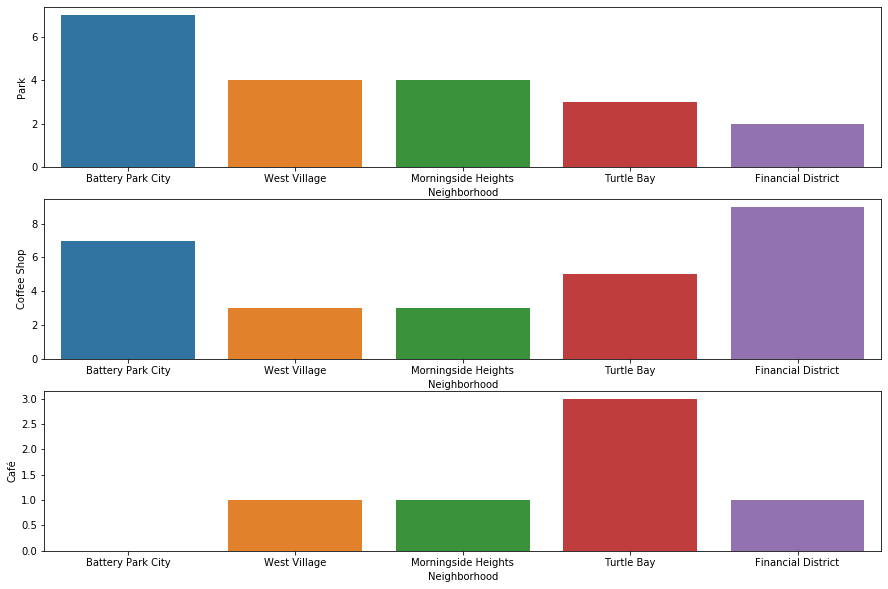

In [25]:
# use seaborn barplot to plot the data
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(3,1,1)
sns.barplot(x='Neighborhood',y='Park',data=manhattan_no_yoga.head(5))

ax = plt.subplot(3,1,2)
sns.barplot(x='Neighborhood',y='Coffee Shop',data=manhattan_no_yoga.head(5))

ax = plt.subplot(3,1,3)
sns.barplot(x='Neighborhood',y='Café',data=manhattan_no_yoga.head(5))

plt.show()

Run k-means to cluster the neighborhood into 5 clusters

In [26]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 2, 0, 1, 1])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Accessories Store,Outdoor Sculpture,Other Great Outdoors,Organic Grocery,Optical Shop,Opera House,Office,Noodle House,Outdoors & Recreation,Non-Profit
1,Manhattan,Chinatown,40.715618,-73.994279,1,Accessories Store,Non-Profit,Nightclub,Newsstand,Nail Salon,Music School,Movie Theater,Office,Moroccan Restaurant,Molecular Gastronomy Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Indie Theater,Nail Salon,Music Venue,Music School,Museum,Movie Theater,Moroccan Restaurant,Newsstand,Monument / Landmark,Modern European Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,0,Accessories Store,Optical Shop,Opera House,Office,Noodle House,Non-Profit,Nightclub,Newsstand,New American Restaurant,Nail Salon
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Accessories Store,Other Great Outdoors,Organic Grocery,Optical Shop,Opera House,Office,Noodle House,Non-Profit,Nightclub,Newsstand


In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Clothing Store,Memorial Site,BBQ Joint,Women's Store,Gourmet Shop,Italian Restaurant
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,French Restaurant,Japanese Restaurant,Italian Restaurant,Bakery,Gym,Bookstore
2,Central Harlem,Chinese Restaurant,Bar,Seafood Restaurant,African Restaurant,American Restaurant,Cosmetics Shop,Art Gallery,French Restaurant,Spa,Gym / Fitness Center
3,Chelsea,Coffee Shop,Italian Restaurant,Bakery,Ice Cream Shop,American Restaurant,Art Gallery,Nightclub,Hotel,Theater,Market
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Spa,Bakery,Optical Shop,Hotpot Restaurant,Ice Cream Shop
5,Civic Center,Gym / Fitness Center,Coffee Shop,Hotel,French Restaurant,Spa,Italian Restaurant,Bakery,Sandwich Place,Cocktail Bar,Yoga Studio
6,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,American Restaurant,Spa,Coffee Shop,Wine Shop,Gym,Hotel,Sandwich Place
7,East Harlem,Mexican Restaurant,Deli / Bodega,Latin American Restaurant,Bakery,Thai Restaurant,Pizza Place,Park,Restaurant,Beer Bar,Cuban Restaurant
8,East Village,Bar,Ice Cream Shop,Chinese Restaurant,Cocktail Bar,Mexican Restaurant,Wine Bar,Pizza Place,Italian Restaurant,Speakeasy,Korean Restaurant
9,Financial District,Coffee Shop,Bar,American Restaurant,Food Truck,Pizza Place,Hotel,Gym,Gym / Fitness Center,Steakhouse,Cocktail Bar


In [30]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 2, 0, 1, 1])

In [31]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Sandwich Place,Gym,Coffee Shop,Donut Shop,Tennis Stadium,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Yoga Studio
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Spa,Bakery,Optical Shop,Hotpot Restaurant,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Grocery Store,Bakery,Mobile Phone Shop,Mexican Restaurant,Spanish Restaurant,Sandwich Place,Chinese Restaurant,Supermarket,Supplement Shop
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Lounge,Café,Pizza Place,Restaurant,Spanish Restaurant,Bakery,Chinese Restaurant,Frozen Yogurt Shop,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Yoga Studio,Caribbean Restaurant,Sushi Restaurant,Indian Restaurant,Park


Finally, let's visualize the resulting clusters

In [32]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now, let's examine each cluster and determine the discriminating venue categories that distinguish each cluster.

In [34]:
# cluster 1
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Café,Pizza Place,Restaurant,Spanish Restaurant,Bakery,Chinese Restaurant,Frozen Yogurt Shop,Park
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Yoga Studio,Caribbean Restaurant,Sushi Restaurant,Indian Restaurant,Park
5,Manhattanville,Coffee Shop,Deli / Bodega,Chinese Restaurant,Park,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Boutique,Climbing Gym,Falafel Restaurant
7,East Harlem,Mexican Restaurant,Deli / Bodega,Latin American Restaurant,Bakery,Thai Restaurant,Pizza Place,Park,Restaurant,Beer Bar,Cuban Restaurant
25,Manhattan Valley,Bar,Pizza Place,Indian Restaurant,Mexican Restaurant,Yoga Studio,Thai Restaurant,Coffee Shop,Farmers Market,Sushi Restaurant,Latin American Restaurant
36,Tudor City,Café,Park,Mexican Restaurant,Greek Restaurant,Pizza Place,Diner,Coffee Shop,Deli / Bodega,Asian Restaurant,Sushi Restaurant


In [35]:
# cluster 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Spa,Bakery,Optical Shop,Hotpot Restaurant,Ice Cream Shop
2,Washington Heights,Café,Grocery Store,Bakery,Mobile Phone Shop,Mexican Restaurant,Spanish Restaurant,Sandwich Place,Chinese Restaurant,Supermarket,Supplement Shop
6,Central Harlem,Chinese Restaurant,Bar,Seafood Restaurant,African Restaurant,American Restaurant,Cosmetics Shop,Art Gallery,French Restaurant,Spa,Gym / Fitness Center
8,Upper East Side,Exhibit,Italian Restaurant,Art Gallery,Bakery,Juice Bar,Gym / Fitness Center,Pizza Place,French Restaurant,Hotel,Coffee Shop
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Wine Shop,Japanese Restaurant,Mexican Restaurant
10,Lenox Hill,Coffee Shop,Pizza Place,Italian Restaurant,Cocktail Bar,Sushi Restaurant,Burger Joint,Gym,Café,Gym / Fitness Center,Salad Place
11,Roosevelt Island,Sandwich Place,Park,Indie Theater,Baseball Field,Bubble Tea Shop,Soccer Field,School,Coffee Shop,Residential Building (Apartment / Condo),Playground
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Coffee Shop,Indian Restaurant,Mediterranean Restaurant,Café,Bakery,Breakfast Spot,Thai Restaurant
15,Midtown,Hotel,Coffee Shop,Clothing Store,Sporting Goods Shop,Bakery,Café,Theater,Steakhouse,Cocktail Bar,Bookstore
16,Murray Hill,Sandwich Place,Coffee Shop,Japanese Restaurant,American Restaurant,Gym / Fitness Center,Bar,Hotel,Italian Restaurant,Pizza Place,Mediterranean Restaurant


In [36]:
# cluster 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Lincoln Square,Plaza,Italian Restaurant,Theater,Café,Concert Hall,Performing Arts Venue,Gym / Fitness Center,American Restaurant,Indie Movie Theater,Park
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,American Restaurant,Spa,Coffee Shop,Wine Shop,Gym,Hotel,Sandwich Place
24,West Village,Italian Restaurant,New American Restaurant,Cosmetics Shop,Wine Bar,American Restaurant,Park,Cocktail Bar,Ice Cream Shop,Coffee Shop,Theater
39,Hudson Yards,American Restaurant,Italian Restaurant,Gym / Fitness Center,Café,Hotel,Coffee Shop,Bar,Burger Joint,Gym,Spanish Restaurant


In [37]:
# cluster 4
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Gym,Coffee Shop,Donut Shop,Tennis Stadium,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Yoga Studio


In [38]:
# cluster 5
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Park,Pet Service,Boat or Ferry,Baseball Field,German Restaurant,Gym / Fitness Center,Cocktail Bar,Harbor / Marina,Coffee Shop


### Obtain nearby venues in Toronto for our analysis
Now let's do the same analysis for Toronto and see if we get better result in Toronto

In [39]:
# get venue data for Toronto neighbourhood
toronto_venues_df = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

Harbourfront
Queen's Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

In [40]:
# analyse each neighborhood
# use one hot encoding for each venue category
toronto_onehot = pd.get_dummies(toronto_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add the neighborhood column back into the dataframe
toronto_onehot['Neighborhood'] = toronto_venues_df['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

# group rows by neighborhood and calculate the mean of the frequency of occurrence for each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [41]:
toronto_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,0.0,0.010000,0.0,0.02,0.0,0.000000,0.000000,0.0,0.000000,0.030000,0.0,0.040000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.01,0.000000,0.01,0.020000,0.000000,0.0,0.01,0.03,0.010000,0.0,0.0,0.000000,0.040000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.01,0.000000,0.060000,0.0,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.03,0.0,0.0,0.000000,0.0,0.0,0.0,0.01,0.010000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.0,0.000000,0.000000,0.0,0.

In [42]:
# create a new dataframe and includes the top 10 least common venues for each neighborhood
no_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(no_of_top_venues):
    try:
        columns.append('{}{} Least Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Least Common Venue'.format(ind+1))

# create a new dataframe
tor_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
tor_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    tor_neighborhoods_venues_sorted.iloc[ind, 1:] = return_least_common_venues(toronto_grouped.iloc[ind, :], no_of_top_venues)

tor_neighborhoods_venues_sorted

,Neighborhood,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,"Adelaide, King, Richmond",Yoga Studio,Gift Shop,Spa,Gourmet Shop,Southern / Soul Food Restaurant,Grocery Store,Wings Joint,Snack Place,Harbor / Marina,Health & Beauty Service
1,Berczy Park,Yoga Studio,Latin American Restaurant,Light Rail Station,Lingerie Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store
2,"Brockton, Exhibition Place, Parkdale Village",Yoga Studio,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Gym,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Yoga Studio,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
5,"Cabbagetown, St. James Town",Yoga Studio,Light Rail Station,Lingerie Store,Lounge,Mac & Cheese Joint,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant
6,Central Bay Street,Gym,Jewelry Store,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market
7,"Chinatown, Grange Park, Kensington Market",Yoga Studio,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant
8,Christie,Yoga Studio,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant
9,Church and Wellesley,Women's Store,Harbor / Marina,Spa,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Southern / Soul Food Restaurant,Gym / Fitness Center


In [43]:
tor_neighborhoods_venues_sorted['1st Least Common Venue'].value_counts()

Yoga Studio      28
Gym               7
Women's Store     4
Name: 1st Least Common Venue, dtype: int64

In [44]:
# group rows by neighborhood and calculate the mean of the frequency of occurrence for each category
toronto_grouped2 = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped2.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0,0,0,0,0,0,0,2,0,0,1,0,2,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,1,3,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,1,0,0,2,0,3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,1,0,1,0,2,1,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,1,0,0,0,3,0,0,1,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0,0,0,3,0,0,0,3,0,1,0,0,0,0,0,4,1,0,0,0,0,0,2,0,0,1,0,1
1,Berczy Park,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,2,0,0,0,1,1,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,2,0,0,0,0,0,2,4,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0

In [45]:
# check the number of yoga studios in Toronto
toronto_grouped2['Yoga Studio'].sum()

11

In [46]:
# check the number of gyms in Toronto
toronto_grouped2['Gym'].sum()

25

This is more promising. There is only 11 yoga studios available in Toronto so far.

Now let's check the top most common venues in the area and see what other venues are available in Toronto.

In [47]:
# create a function to sort the venues in descending order
def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
# create a new dataframe and includes the top 10 venues for each neighborhood
no_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(no_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = most_common_venues(toronto_grouped.iloc[ind, :], no_of_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Thai Restaurant,Steakhouse,Bakery,Cosmetics Shop,Sushi Restaurant,Restaurant,Burger Joint
1,Berczy Park,Coffee Shop,Seafood Restaurant,Cheese Shop,Steakhouse,Bakery,Farmers Market,Café,Beer Bar,Cocktail Bar,Department Store
2,"Brockton, Exhibition Place, Parkdale Village",Café,Breakfast Spot,Coffee Shop,Bakery,Climbing Gym,Burrito Place,Stadium,Italian Restaurant,Restaurant,Intersection
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Skate Park,Smoke Shop,Spa,Burrito Place,Farmers Market,Fast Food Restaurant,Restaurant,Recording Studio
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Harbor / Marina,Rental Car Location,Coffee Shop,Plane,Boat or Ferry,Bar
5,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Bakery,Italian Restaurant,Pizza Place,Chinese Restaurant,Pub,Café,Park,Butcher
6,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Juice Bar,Burger Joint,Japanese Restaurant,Ice Cream Shop,Chinese Restaurant,Thai Restaurant,Bakery
7,"Chinatown, Grange Park, Kensington Market",Bar,Café,Vietnamese Restaurant,Dumpling Restaurant,Chinese Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Mexican Restaurant,Bakery,Park
8,Christie,Grocery Store,Café,Park,Baby Store,Restaurant,Italian Restaurant,Athletics & Sports,Diner,Nightclub,Gas Station
9,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Gastropub


Perform the k-means clustering algorithm

In [49]:
# use k-means to cluster the neighborhood into 5 clusters
# set number of clusters
kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
toronto_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
toronto_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       4, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
# create a new dataframe that includes the 5 clusters + top 10 venues for each neighborhood
toronto_df.columns = ['Postcode','Borough','Neighborhood','Latitude','Longitude']

# add clustering labels
neighborhoods_venues_sorted.insert(0,'Cluster Labels',toronto_kmeans.labels_)

toronto_merged = toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on ='Neighborhood')

# check the last columns!
toronto_merged.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Pub,Park,Bakery,Mexican Restaurant,Theater,Breakfast Spot,Restaurant,Café,Shoe Store
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0,Coffee Shop,Gym,Park,Burger Joint,Fast Food Restaurant,Portuguese Restaurant,Mexican Restaurant,Juice Bar,Japanese Restaurant,Italian Restaurant
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Cosmetics Shop,Bookstore,Thai Restaurant,Bakery,Lingerie Store,Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Restaurant,Clothing Store,Breakfast Spot,Beer Bar,Cosmetics Shop,American Restaurant,Bakery,Hotel
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Pub,Park,Other Great Outdoors,Trail,Health Food Store,Asian Restaurant,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner


In [51]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [52]:
# create the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:
# cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Pub,Park,Bakery,Mexican Restaurant,Theater,Breakfast Spot,Restaurant,Café,Shoe Store
1,Downtown Toronto,0,Coffee Shop,Gym,Park,Burger Joint,Fast Food Restaurant,Portuguese Restaurant,Mexican Restaurant,Juice Bar,Japanese Restaurant,Italian Restaurant
2,Downtown Toronto,0,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Cosmetics Shop,Bookstore,Thai Restaurant,Bakery,Lingerie Store,Restaurant
3,Downtown Toronto,0,Café,Coffee Shop,Restaurant,Clothing Store,Breakfast Spot,Beer Bar,Cosmetics Shop,American Restaurant,Bakery,Hotel
4,East Toronto,0,Pub,Park,Other Great Outdoors,Trail,Health Food Store,Asian Restaurant,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner
5,Downtown Toronto,0,Coffee Shop,Seafood Restaurant,Cheese Shop,Steakhouse,Bakery,Farmers Market,Café,Beer Bar,Cocktail Bar,Department Store
6,Downtown Toronto,0,Coffee Shop,Sandwich Place,Italian Restaurant,Juice Bar,Burger Joint,Japanese Restaurant,Ice Cream Shop,Chinese Restaurant,Thai Restaurant,Bakery
7,Downtown Toronto,0,Grocery Store,Café,Park,Baby Store,Restaurant,Italian Restaurant,Athletics & Sports,Diner,Nightclub,Gas Station
8,Downtown Toronto,0,Coffee Shop,Café,Bar,Thai Restaurant,Steakhouse,Bakery,Cosmetics Shop,Sushi Restaurant,Restaurant,Burger Joint
9,West Toronto,0,Pharmacy,Bakery,Athletics & Sports,Bus Stop,Café,Middle Eastern Restaurant,Supermarket,Bar,Bank,Portuguese Restaurant


In [54]:
# cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,1,Playground,Tennis Court,Women's Store,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [55]:
# cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,2,Park,Jewelry Store,Trail,Sushi Restaurant,Women's Store,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
33,Downtown Toronto,2,Park,Playground,Trail,Women's Store,Deli / Bodega,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [56]:
# cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,3,Music Venue,Pool,Garden,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [57]:
# cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,4,Park,Swim School,Bus Line,Women's Store,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [58]:
# show the most common venues in Toronto
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Coffee Shop           13
Café                   4
Park                   4
Pub                    2
Bar                    2
Gym                    1
Airport Service        1
Grocery Store          1
Dessert Shop           1
Gift Shop              1
Sandwich Place         1
Pizza Place            1
Playground             1
Music Venue            1
Mexican Restaurant     1
Greek Restaurant       1
Yoga Studio            1
Pharmacy               1
Clothing Store         1
Name: 1st Most Common Venue, dtype: int64

Looks like Toronto area is surrounded by parks and coffee shops and cafes. A good sign for our business partner, YogaBear to open a yoga studio in the area.

Now, let's check how many of those yoga studios, parks and cafes/coffee shops are actually available in the area.

In [59]:
# sort based on the number of yoga studio available in each neighborhood
toronto_no_yoga = toronto_grouped2.sort_values('Yoga Studio')

In [60]:
# include only neighboorhoods with zero yoga studio
toronto_no_yoga = toronto_no_yoga[toronto_no_yoga['Yoga Studio']==0]
toronto_no_yoga.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0,0,0,0,0,0,0,2,0,0,1,0,2,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,1,3,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,1,0,0,2,0,3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,1,0,1,0,2,1,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,1,0,0,0,3,0,0,1,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0,0,0,3,0,0,0,3,0,1,0,0,0,0,0,4,1,0,0,0,0,0,2,0,0,1,0,1
26,"Parkdale, Roncesvalles",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [61]:
# sort the neighboorhoods based on the number of parks, coffee shops and cafes
toronto_no_yoga2 = toronto_no_yoga.sort_values(by=['Park','Coffee Shop','Café'],ascending=False)[['Neighborhood','Yoga Studio','Park','Coffee Shop','Café']]
toronto_no_yoga2

,Neighborhood,Yoga Studio,Park,Coffee Shop,Café
20,"Harbourfront East, Toronto Islands, Union Station",0,2,12,4
33,Stn A PO Boxes 25 The Esplanade,0,2,11,4
32,St. James Town,0,2,6,6
7,"Chinatown, Grange Park, Kensington Market",0,2,4,5
8,Christie,0,2,1,3
37,"The Beaches West, India Bazaar",0,2,1,0
28,Rosedale,0,2,0,0
10,"Commerce Court, Victoria Hotel",0,1,11,7
1,Berczy Park,0,1,4,2
5,"Cabbagetown, St. James Town",0,1,3,2


Now let's visualize our data on the chart

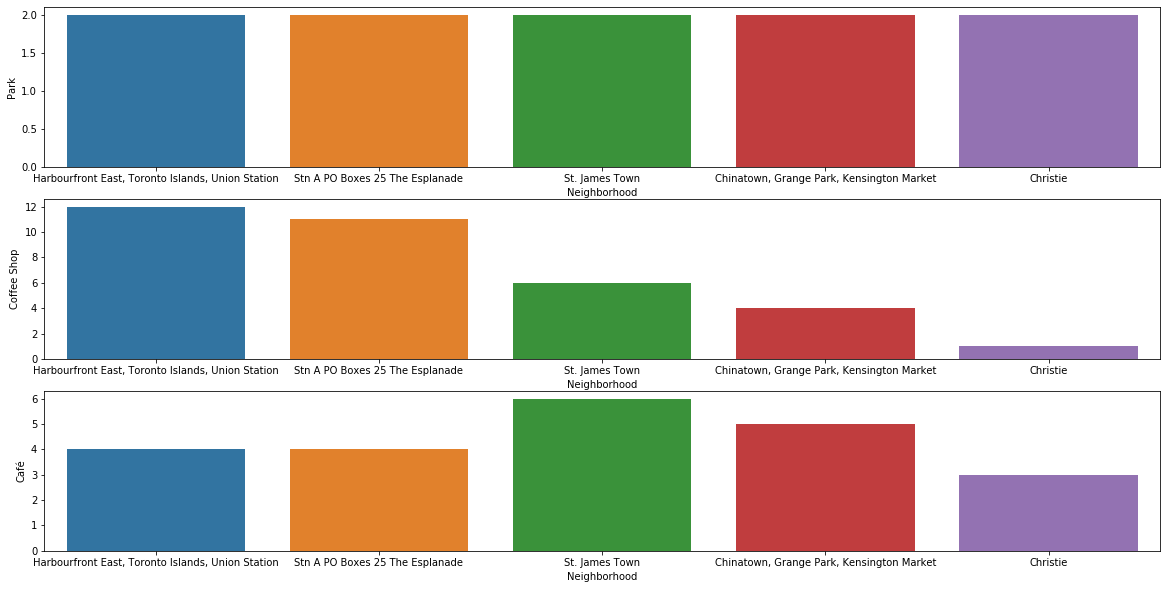

In [62]:
# plot the above data on barpots
fig = plt.figure(figsize=(20,10))

ax = plt.subplot(3,1,1)
sns.barplot(x='Neighborhood',y='Park',data=toronto_no_yoga2.head(5))

ax = plt.subplot(3,1,2)
sns.barplot(x='Neighborhood',y='Coffee Shop',data=toronto_no_yoga2.head(5))

ax = plt.subplot(3,1,3)
sns.barplot(x='Neighborhood',y='Café',data=toronto_no_yoga2.head(5))

plt.show()

Based on the above analysis, we can see that the first three neighborhoods meet our criteria to open a new yoga studio. There is no competition available in those neighborhoods (nil yoga studio), and these places are surrounded by parks and coffee shops/cafes.

In [63]:
# our proposed chosen places for our new yoga studio
chosen_place = toronto_no_yoga2.head(3)
chosen_place

,Neighborhood,Yoga Studio,Park,Coffee Shop,Café
20,"Harbourfront East, Toronto Islands, Union Station",0,2,12,4
33,Stn A PO Boxes 25 The Esplanade,0,2,11,4
32,St. James Town,0,2,6,6


Now let's plot our proposed locations on the map to see exactly where they are. For comparison, we will also show the locations of the neighborhoods that are not recommended for our new yoga studio (the bottom 8 in the above table).

In [64]:
# our proposed chosen places including the latitude and longitude
chosen_place_merged = pd.merge(toronto_df,chosen_place[['Neighborhood','Yoga Studio','Park','Coffee Shop','Café']],on='Neighborhood',how='right')
chosen_place_merged

,Postcode,Borough,Neighborhood,Latitude,Longitude,Yoga Studio,Park,Coffee Shop,Café
0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,2,6,6
1,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,0,2,12,4
2,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,0,2,11,4


In [65]:
# other places that are not recommended
not_chosen_place = toronto_no_yoga2.tail(8)
not_chosen_place_merged = pd.merge(toronto_df,not_chosen_place[['Neighborhood','Yoga Studio','Park','Coffee Shop','Café']],on='Neighborhood',how='right')
not_chosen_place_merged

,Postcode,Borough,Neighborhood,Latitude,Longitude,Yoga Studio,Park,Coffee Shop,Café
0,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,0,8,3
1,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0,0,6,4
2,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,0,0,2,3
3,M5N,Central Toronto,Roselawn,43.711695,-79.416936,0,0,0,0
4,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,0,0,1,0
5,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,0,0,0
6,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,0,0,2,0
7,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,0,0,1,0


In [66]:
# get the latitude and longitude of Toronto, Canada
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The coordinate of Toronto, Canada are 43.653963, -79.387207.


In [67]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_place = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
# chosen places
for lat, lng, label in zip(not_chosen_place_merged['Latitude'], not_chosen_place_merged['Longitude'], not_chosen_place_merged['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_place)  

# places not chosen
for lat, lng, label in zip(chosen_place_merged['Latitude'], chosen_place_merged['Longitude'], chosen_place_merged['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_place)  
    
map_chosen_place

The green markers above are the recommended places for our new yoga studio. YogaBear can choose one of them to begin their first overseas investment. The smaller red markers show the places we do not recommend, at least at this stage.